<a href="https://colab.research.google.com/github/MuskanSultanak/muskan_sultana_k_INBT02581_Aug_2023/blob/main/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN MODEL IMPLENTATION ON CIFAR-10 DATASET**

# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG19
from keras.optimizers import Adam
from sklearn.metrics import  confusion_matrix,classification_report


In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# **SPLITTING OF DATASET**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(X_train.shape)
X_train_split = X_train[:40000]
y_train_split = y_train[:40000]

X_val = X_train[40000:]
y_val = y_train[40000:]
print(X_train_split.shape)
print(X_val.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)


# **IMPLEMENTING VGG19 MODEL**

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

NameError: ignored

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

80134624/80134624 [==============================] - 0s 0us/step


# **CREATING CNN MODEL**

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
lr=0.001
model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
 history=model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 3208s 10s/step - loss: 2.3547 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 2/3
313/313 [==============================] - 3186s 10s/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/3
313/313 [==============================] - 3185s 10s/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0952


# **ACCURACY**

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100}")

313/313 [==============================] - 111s 355ms/step - loss: 2.3026 - accuracy: 0.1000
Test Accuracy: [2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000149011612, 2.3026351928710938, 0.10000000

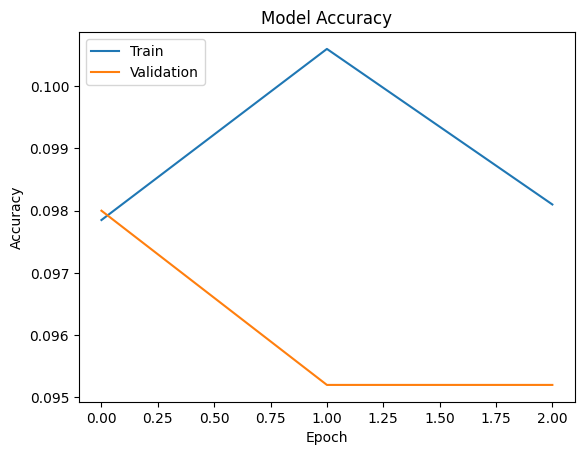

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')


plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split=0.2)

313/313 [==============================] - 101s 320ms/step - loss: 1.4770 - accuracy: 0.4726 - val_loss: 1.1848 - val_accuracy: 0.5897


In [ ]:
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)
print(f"CNN Model - Test Loss: {cnn_loss:.4f}")
print(f"CNN Model - Test Accuracy: {cnn_accuracy*100:.2f}%")

313/313 [==============================] - 7s 21ms/step - loss: 1.1726 - accuracy: 0.5924
CNN Model - Test Loss: 1.1726
CNN Model - Test Accuracy: 59.24%


In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

# **TRANSFER LEARNING**

In [ ]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='softmax'))
lr=0.001
transfer_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split=0.2)

313/313 [==============================] - 485s 2s/step - loss: 1.6306 - accuracy: 0.4263 - val_loss: 1.3708 - val_accuracy: 0.5162


In [ ]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(X_test, y_test)
print(f"Transfer Learning Model - Test Loss: {transfer_loss:.4f}")
print(f"Transfer Learning Model - Test Accuracy: {transfer_accuracy*100:.2f}%")

313/313 [==============================] - 100s 320ms/step - loss: 1.3779 - accuracy: 0.5227
Transfer Learning Model - Test Loss: 1.3779
Transfer Learning Model - Test Accuracy: 52.27%


In [ ]:
transfer_pred = transfer_model.predict(X_test)
transfer_labels = np.argmax(y_test, axis=1)
transfer_pred = np.argmax(transfer_pred, axis=1)

313/313 [==============================] - 99s 317ms/step


In [ ]:
transfer_report = classification_report(transfer_labels, transfer_pred)
transfer_confusion = confusion_matrix(transfer_labels, transfer_pred)
print("Transfer Learning Model Evaluation Metrics:")
print(transfer_report)
print("Transfer Learning Model Confusion Matrix:")
print(transfer_confusion)

Transfer Learning Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.66      0.49      0.57      1000
           1       0.50      0.61      0.55      1000
           2       0.44      0.34      0.39      1000
           3       0.38      0.42      0.40      1000
           4       0.55      0.46      0.50      1000
           5       0.46      0.49      0.48      1000
           6       0.57      0.60      0.59      1000
           7       0.58      0.55      0.56      1000
           8       0.61      0.66      0.63      1000
           9       0.51      0.61      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000

Transfer Learning Model Confusion Matrix:
[[494  54  87  35  12  12  11  31 190  74]
 [ 21 607  18  53  10  31  19  22  38 181]
 [ 75  55 345 105  94 117  96  44  43  26]
 [ 20  68  54 416  40 165 

In [ ]:
cnn_pred = model.predict(X_test)
cnn_labels = np.argmax(y_test, axis=1)
cnn_pred = np.argmax(cnn_pred, axis=1)

313/313 [==============================] - 7s 21ms/step


In [ ]:
cnn_report = classification_report(cnn_labels, cnn_pred)
cnn_confusion = confusion_matrix(cnn_labels, cnn_pred)
print("CNN Model Evaluation Metrics:")
print(cnn_report)
print("CNN Model Confusion Matrix:")
print(cnn_confusion)

CNN Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1000
           1       0.72      0.72      0.72      1000
           2       0.53      0.37      0.43      1000
           3       0.50      0.26      0.34      1000
           4       0.48      0.63      0.55      1000
           5       0.42      0.67      0.51      1000
           6       0.74      0.58      0.65      1000
           7       0.69      0.60      0.64      1000
           8       0.71      0.68      0.70      1000
           9       0.63      0.70      0.66      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000

CNN Model Confusion Matrix:
[[721  26  54  10  23  15   9   4  88  50]
 [ 44 720  12   3   4   8   6  10  54 139]
 [ 97  16 368  39 185 158  50  37  21  29]
 [ 34  12  65 261 119 346  63  38  18  44]
 [ 39   7  

# **CONFUSION MATRIX FOR CNN MODEL**

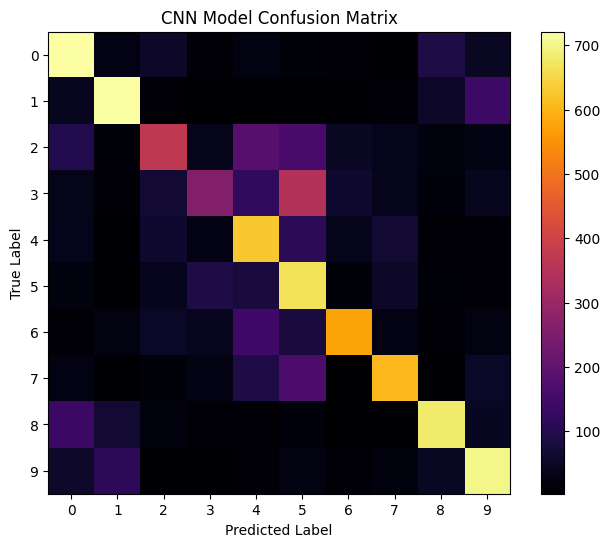

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cnn_confusion, cmap='inferno')
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

# **CONFUSION MATRIX FOR TRANSFER LEARNING MODEL**

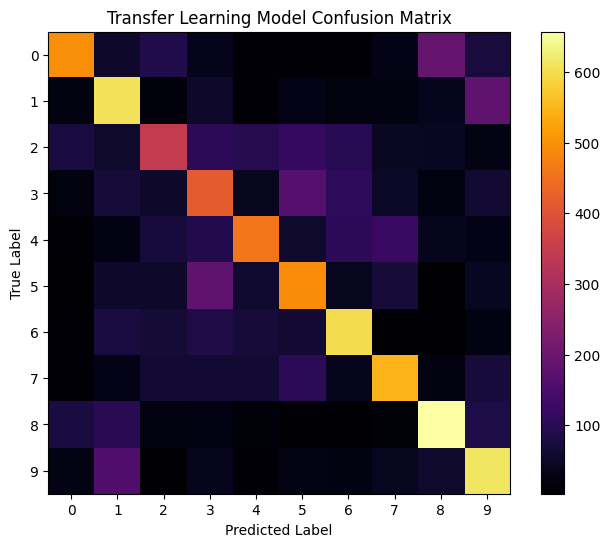

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(transfer_confusion, cmap='inferno')
plt.title('Transfer Learning Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [ ]:
metrics_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Test Loss': [cnn_loss, transfer_loss],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

# **METRICS EVALUATION**

In [ ]:
print("Evaluation Metrics:")
print(metrics_table)

Evaluation Metrics:
                     Model  Test Loss  Test Accuracy
0                CNN Model   1.172640         0.5924
1  Transfer Learning Model   1.377926         0.5227


In [ ]:
cnn_train_loss, cnn_train_acc = model.evaluate(X_train, y_train)
print(f"CNN Model - Training Loss: {cnn_train_loss:.4f}")
print(f"CNN Model - Training Accuracy: {cnn_train_acc*100:.2f}%")

1563/1563 [==============================] - 31s 20ms/step - loss: 1.1278 - accuracy: 0.6087
CNN Model - Training Loss: 1.1278
CNN Model - Training Accuracy: 60.87%


In [ ]:
transfer_train_loss, transfer_train_acc = transfer_model.evaluate(X_train, y_train)
print(f"Transfer Learning Model - Training Loss: {transfer_train_loss:.4f}")
print(f"Transfer Learning Model - Training Accuracy: {transfer_train_acc*100:.2f}%")

1563/1563 [==============================] - 506s 324ms/step - loss: 1.3616 - accuracy: 0.5259
Transfer Learning Model - Training Loss: 1.3616
Transfer Learning Model - Training Accuracy: 52.59%


# **PERFORMANCE OF MODEL**

In [ ]:
performance_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Training Accuracy': [cnn_train_acc, transfer_train_acc],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

print("Model Performance on Training and Testing Sets:")
print(performance_table)

Model Performance on Training and Testing Sets:
                     Model  Training Accuracy  Test Accuracy
0                CNN Model            0.60874         0.5924
1  Transfer Learning Model            0.52586         0.5227
